<a href="https://colab.research.google.com/github/SheidaTalei/FinalProject/blob/main/SheidaTalei_Preprocessing_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUBJECT: Preprocessing 
## Author:  Sheida Talei

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Mounted at /content/drive


In [ ]:
#!pip install --target=$nb_path hazm

  Using cached https://files.pythonhosted.org/packages/22/13/5a7074bc11d20dbbb46239349ac3f85f7edc148b4cf68e9b8c2f8263830c/hazm-0.7.0-py3-none-any.whl
Processing /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c/nltk-3.3-cp36-none-any.whl
Processing /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab/libwapiti-0.2.1-cp36-cp36m-linux_x86_64.whl
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
#!pip install --target=$nb_path persianutils

  Using cached https://files.pythonhosted.org/packages/80/9c/5c382b9f45afc205e6c26cc94ed55b17949f3fa3a827f53571a6796257a4/persianutils-0.1.2-py3-none-any.whl


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
#Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import regex
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from hazm import *
import re
import string
import persianutils as pu
import persianutils.PersianAlphabet as pALpha




In [ ]:
# !pip install hazm

In [ ]:
# !pip install persianutils

In [ ]:
#------------------------------------------Empty Rows Removal----------------------------------------------------------------
# This function Will: 1- Remove all empty rows from csv file 2- Save data to the same csv
def removeEmptyRows(fileName):
    df = pd.read_csv(fileName, encoding='utf-8-sig')
    df = df.dropna(subset=['text'], how='all', axis=0) 
    df.to_csv(fileName, header=True, encoding='utf-8-sig',  index=False)
    
    return df

In [ ]:
#------------------------------------------------Normalization---------------------------------------------------------------
# This function will: 1- Normalize tweets (replace space with half-space)
def normalization (content):
    normalizer = Normalizer()
    tweets_normalize_list = []
    temp_set = []
    for item in range (len(content)):
        for word in content[item]:
            temp_word = normalizer.normalize(word)
            temp_set.append(temp_word.replace('\u200c', ' ', 1000000000))
                
                
        tweets_normalize_list.append(set(temp_set))
        temp_set = []
        
    return tweets_normalize_list

In [ ]:
#---------------------------------------------------- Latin and Punctuation Removal-------------------------------------------
# This function will: 1- Remove latin words 2- Remove punctuations
# Source: https://stackoverflow.com/questions/18429143/strip-punctuation-with-regex-python/50985687
def latinRemoval(content):
    only_persian_tweet_list =[]
    temp_set = []

    latin = re.compile(r'[a-zA-Z0-9@$!%*?&-_`.+#(»)«,:;،؛…..؟]+')  

    for item in range(len(content)):
        for word in content[item]:
            temp_word = word.replace('\u200c', ' ', 1000000000)
               
            if not(latin.match(temp_word)) :
                if not temp_word.isdigit():
                        #source: https://pypi.org/project/persianutils/
                    word = re.findall(r'[^۰-۹]+', temp_word.strip(string.punctuation))
                    
                    if len(word) >0:    
                        processed_text = pu.standardize4Word2vec(word[0].strip())

                        if (processed_text != ' '):
#                             print(processed_text)
                            word = re.findall('\d+', processed_text.strip())
                            if len(word)==0 : 
                                temp_set.append(processed_text.strip())
                                print (processed_text.strip())
           
        only_persian_tweet_list.append(set(temp_set))
        temp_set = []
        
    return only_persian_tweet_list

In [ ]:
#--------------------------------------------------Loading StopWords ------------------------------------------
#Source of file: https://sites.google.com/site/kevinbouge/stopwords-lists
def getStopWord ():
    try:
        file = open('/content/drive/MyDrive/Final/stopwords_fa.txt', 'r', encoding='utf-8-sig')
        file_readed = file.read()
    
    finally:
        file.close()
        
    stopWord_Set = set(file_readed.split())
    return stopWord_Set


In [ ]:
#------------------------------------Tokenization and Stop Word Removal------------------------------------------------------
# This function will: 1- Tokenize words  2- Remove stop words and return a list of sets
def getTweetNoStopWord(content):
    tweet_no_StopWord_list =[]
    temp_set = []
    stop_word_list = getStopWord()
    for item in range(len(content)):
        for word in content[item]:
            if not word in stop_word_list:
                temp_set.append(word.replace('\u200c', ' ', 1000000000))
                
        tweet_no_StopWord_list.append(set (temp_set))
        temp_set = []
        
    return tweet_no_StopWord_list

In [ ]:
#----------------------------------------------Lemmatization ------------------------------------------------------------------
def Lemmatization (content):
    lemmatizer = Lemmatizer()
    tweets_lemmatize_list = []
    temp_set = []
    for item in range(len(content)):
        for word in (content[item]):
            temp_set.append(lemmatizer.lemmatize(word.replace('\u200c', ' ', 1000000000)))
        tweets_lemmatize_list.append(set(temp_set))
        temp_set = []
    
    return tweets_lemmatize_list

In [ ]:
#---------------------------------------------------Tokenization-------------------------------------------------------------
# Tokenizing X and at the end append Y as a label
def tokenization (X):
    tokenized_train_data = []
    for item in range(len(X)):
        var = word_tokenize(X[item])
#         var.append(Y[item])
        tokenized_train_data.append(var)
        
    return tokenized_train_data    

In [ ]:
#Loading data

dfPrime_1 = pd.read_csv ('/content/drive/MyDrive/Final/Prime#1.csv', encoding='utf-8-sig')
dfPrime_2 = pd.read_csv ('/content/drive/MyDrive/Final/Prime#2.csv', encoding='utf-8-sig')
dfPrime_3 = pd.read_csv ('/content/drive/MyDrive/Final/Prime#3.csv', encoding='utf-8-sig')


df1 =  pd.read_csv ('/content/drive/MyDrive/Final/Main#1.csv', encoding='utf-8-sig')
df2 = pd.read_csv ('/content/drive/MyDrive/Final/Main#2.csv', encoding='utf-8-sig')
df3 = pd.read_csv ('/content/drive/MyDrive/Final/Main#3.csv', encoding='utf-8-sig')
df4 = pd.read_csv ('/content/drive/MyDrive/Final/Main#4.csv', encoding='utf-8-sig')
df5 = pd.read_csv ('/content/drive/MyDrive/Final/Main#5.csv', encoding='utf-8-sig')




data_frame= pd.concat([dfPrime_1, dfPrime_2,dfPrime_3,df1, df2, df3, df4, df5], ignore_index=True, names=['tweeter_handle', 'text', 'Label', 'statues_count' ])


In [ ]:
#----------------------------------------------------------Step1----------------------------------------------------------
#----------------------------------Normalization_StopWord_Lemmatization_Punctuaation--------------------------------------
#Reading just coulmns of description and Label
# Remove repetetive tweets
def cleanData (df):
    df.drop_duplicates(subset=['text', 'tweeter_handle'], inplace=True)
    # train_data, test_data = train_test_split(df, test_size=0.2)
    # print('train data size: {}    test data size: {}'.format(len(train_data), len(test_data)))
    header = ['tweeter_handle', 'text', 'Label', 'statues_count']
    df.to_csv('/content/drive/MyDrive/Final/X_and_Y.csv', index=False, encoding='utf-8-sig' , columns = header )
    


    #Step 1: Removing empty rows from data set which contains only description and Label
    # This functon will remove empty rows and save them to same file (input file)
    removeEmptyRows('/content/drive/MyDrive/Final/X_and_Y.csv')
    
    #test
    # test_data.to_csv('/content/drive/MyDrive/Final/X_and_Y_test.csv', index=False, encoding='utf-8-sig')
    # #Step 1: Removing empty rows from data set which contains only description and Label
    # # This functon will remove empty rows and save them to same file (input file)
    # removeEmptyRows('/content/drive/MyDrive/Final/X_and_Y_test.csv')
    
    return df

#---------------------------------------------test-------------------------------------------------------------------------



In [ ]:
cleanData (data_frame)


,id,alert_id,title,text,Label,url,published_at,source_type,language,country,favorite,tone,tweeter_handle,source_url,parent_url,parent_id,children,statues_count,cumulative_reach,domain_reach,tags,score,alert_name,description,followers_count,friends_count,listed_count,favourites_count,expanded_URL
0,1.338234e+11,1878333.0,"… لبها:\n\n""حضرت بهاالله و حضرت باب هردو ایران...","""حضرت بهاالله و حضرت باب هردو ایرانی بودند و۲۰...",0.0,https://twitter.com/itanmizrahi/status/1312647...,2020-10-04 06:54:36+00:00,twitter,fa,BJ,0.0,neutral,itanmizrahi,https://twitter.com/itanmizrahi,https://twitter.com/MadinejadMo/status/1312571...,1.338172e+11,0.0,1794.0,1794.0,NaN,NaN,22.0,بهائی + بهائیت + بهائیان+ فرقه بهائیت,NaN,NaN,NaN,NaN,NaN,NaN
1,1.338233e+11,1878333.0,بهائیان قاتل در ایران چه کردند؟ +عکس - مشرق نیوز,بهائیت یکی از مدعیان جانشینی سید کاظم رشتی، عل...,0.0,https://www.mashreghnews.ir/amp/183195/&ved=2a...,2020-10-04 06:53:44+00:00,news,fa,IR,0.0,neutral,mashreghnews.ir,https://mashreghnews.ir,NaN,NaN,0.0,NaN,NaN,992800.0,NaN,49.0,بهائی + بهائیت + بهائیان+ فرقه بهائیت,NaN,NaN,NaN,NaN,NaN,NaN
2,1.338234e+11,1878333.0,… شهادت_ميدهم در سال ۱۳۶۰چهار ماهه بودم که پدر...,RT @Payam49352414: #شهادت_ميدهم در سال ۱۳۶۰چها...,0.0,https://twitter.com/dOxXfGSdtD98jE3/status/131...,2020-10-04 06:42:34+00:00,twitter,fa,NaN,0.0,neutral,dOxXfGSdtD98jE3,https://twitter.com/dOxXfGSdtD98jE3,https://twitter.com/Payam49352414/status/13121...,1.337996e+11,0.0,4.0,4.0,NaN,NaN,9.0,بهائی + بهائیت + بهائیان+ فرقه بهائیت,NaN,NaN,NaN,NaN,NaN,NaN
3,1.338234e+11,1878333.0,@NarimanGharib @bbcpersian فرقه ضاله خمینی مثل...,@NarimanGharib @bbcpersian فرقه ضاله خمینی مثل...,1.0,https://twitter.com/navidtehraniii/status/1312...,2020-10-04 06:25:38+00:00,twitter,fa,NaN,0.0,neutral,navidtehraniii,https://twitter.com/navidtehraniii,NaN,NaN,0.0,1.0,1.0,NaN,NaN,7.0,بهائی + بهائیت + بهائیان+ فرقه بهائیت,NaN,NaN,NaN,NaN,NaN,NaN
4,1.338234e+11,1878333.0,@XrXIII من فرحزاد هستم دیش توییت خانم پاکروان ...,@XrXIII من فرحزاد هستم دیش توییت خانم پاکروان ...,0.0,https://twitter.com/Panke54788386/status/13126...,2020-10-04 06:07:32+00:00,twitter,fa,TJ,0.0,neutral,Panke54788386,https://twitter.com/Panke54788386,NaN,NaN,0.0,46.0,46.0,NaN,NaN,12.0,بهائی + بهائیت + بهائیان+ فرقه بهائیت,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134247,1.319322e+18,NaN,NaN,RT @tanasoli: با دوچرخه از روی اصلاحات رد شد!,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mohiman1360,NaN,NaN,NaN,NaN,9422.0,NaN,NaN,NaN,NaN,NaN,‏‏‏👑🦁🌞\n‏خسته از بودن .\nبودن یا نبودن؟,1457.0,1503.0,0.0,17155.0,NaN
134248,1.319322e+18,NaN,NaN,آخرهفته هم باگاف ضدانقلاب تمام شد. دعوای شخصی ...,0.0,https://t.co/QEj7M6oyjr,NaN,NaN,NaN,NaN,NaN,NaN,zhrwlii17,NaN,NaN,NaN,NaN,11944.0,NaN,NaN,NaN,NaN,NaN,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏🏞‏‏‏‏‏‏‏‏‏‏‏...,5614.0,5072.0,1.0,26522.0,https://twitter.com/i/web/status/1319317306732...
134249,1.319322e+18,NaN,NaN,#مهدی_کاظمی مامور حراست پالایشگاه و #احمد_جهان...,1.0,https://t.co/OwLyM31G08,NaN,NaN,NaN,NaN,NaN,NaN,dilani64,NaN,NaN,NaN,NaN,3474.0,NaN,NaN,NaN,NaN,NaN,NaN,498.0,483.0,0.0,10264.0,https://twitter.com/i/web/status/1319296469522...
134250,1.319322e+18,NaN,NaN,RT @tiredzra: ما همه صدای #دختر_آبادانی هستیم:...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smiley_niyaz,NaN,NaN,NaN,NaN,7314.0,NaN,NaN,NaN,NaN,NaN,‏‏‏‏‏Larrie / Ziam child\n~INFP ~ 🏳️‍🌈 TPWK ~ ...,512.0,392.0,1.0,20687.0,NaN


In [ ]:
#------------------------------------------------------Step 2------------------------------------------------------------------
#step 2: Tokenizing data
X_and_Y = pd.read_csv('/content/drive/MyDrive/Final/X_and_Y.csv',encoding="utf-8")



X = X_and_Y.text
Y= X_and_Y.Label


#Tokenization
tokenize_list = tokenization (X)
#------------------------------------------------------test---------------------------------------------------------------------
#step 2: Tokenizing data
# X_and_Y_test = pd.read_csv('/content/drive/MyDrive/Final/X_and_Y_test.csv',encoding="utf-8")



# X_test = X_and_Y_test.text
# Y_test= X_and_Y_test.Label

# # #Tokenization
# train_data_tokenize_list_test = tokenization (X_test)

In [ ]:
print(tokenize_list[3755])

['@MadinejadMo', 'ته', 'شما', '#بهائیان', 'به', 'چند', 'سال', 'قبل', 'تر', 'بر', 'می', 'گرده', '!!!', 'اولا', 'میگن', 'سر', 'زمین', 'مادری', '!!!', 'دوما', 'وطن', 'برای', 'ما', 'فراتر', 'از', 'تصور', 'شما', 'تعریف', 'میشه', 'تا', 'حدی', 'که', 'جونمون', 'هم', 'در', 'راهش', 'میدیم', 'چه', 'برسه', 'بقیه', 'ی', 'چیزها', '!!!', 'سوما', 'وطن', 'شما', 'که', 'عزیز', 'کانادا', 'قید', 'شده', '!!!!']


In [ ]:
#------------------------------------------------------Step 3------------------------------------------------------------------
#step 3: removing HASHTAGS, MENTIONS, NUMBERS and any LATIN WORD
# This function get tokenized list of data and remove mentioned elements

only_persian_tweet_list = latinRemoval(tokenize_list)
#------------------------------------------------------test--------------------------------------------------------------------
#step 3: removing HASHTAGS, MENTIONS, NUMBERS and any LATIN WORD
# This function get tokenized list of data and remove mentioned elements

# only_persian_tweet_list_test = latinRemoval(train_data_tokenize_list_test)

Streaming output truncated to the last 5000 lines.
خوب
و
خواب
تو
کتابم
یه
روز
اگه
مو
به
تنت
سیخ
نشه
از
اتفاقات
این
خاک
عجیبه
کیر
توی
این
مملکت
کیررررررررررررررر
میشه
اینو
نشر
بدین
بچه
ها
مادرم
اربعین
فرزندت
تسلیت
باد
اهای
ارزشی
و
اصلاح
طلبی
که
برای
جورج
فلوید
امریکایی
هشتگ
زدی
سینه
دریدی
و
شمع
روشن
کردی
این
خانم
غرق
در
خون
هموطن
تو
و
ناموس
ایران
است
که
توسط
مدیر
پالایشگاه
ابادان
مورد
تجاوز
قرار
گرفت
و
کارمندان
حراست
مدیر
هم
او
را
مورد
ضرب
و
شتم
و
تجاوز
قرار
دادند
ابان
تا
ابد
برای
من
یاد
اور
درد
و
اندوهه
ایران
کشوری
بود
که
سال
قبل
زنا
توش
ارزش
داشتن
حکومت
می
کردن
و
باارزش
بودن
سال
قبل
حتی
نمی
تونین
تصور
کنید
این
کشور
چقدر
شگفت
انگیز
بود
و
الان
الان
باز
میان
میگن
یه
سری
ربات
دارن
توییت
میزنن
هر
کاری
هم
انجام
بدین
نمیتونین
ما
رو
ساکت
کنین
ایا
این
فرد
شایستگی
نمایندگی
مردم
امریکا
و
دموکراسی
امریکا
را
دارد
شما
جواب
بده
اس…
تکرار
ابان
و
خون
فک
نمی کردی
کسی
ببینه
داری
به
اون
دختر
مظلوم
تعرض
می کنی
نه
سخنگوی
مجاهدین
درمورد
پرت
و
پلای
سوزناک
وزارتخارجه
ولایت
فقیه
پیدا
کنید
رابطه
بین
مجرد
بودن
و

In [ ]:
print(tokenize_list[3755])
print ('  ')
print(only_persian_tweet_list[3755])

['@MadinejadMo', 'ته', 'شما', '#بهائیان', 'به', 'چند', 'سال', 'قبل', 'تر', 'بر', 'می', 'گرده', '!!!', 'اولا', 'میگن', 'سر', 'زمین', 'مادری', '!!!', 'دوما', 'وطن', 'برای', 'ما', 'فراتر', 'از', 'تصور', 'شما', 'تعریف', 'میشه', 'تا', 'حدی', 'که', 'جونمون', 'هم', 'در', 'راهش', 'میدیم', 'چه', 'برسه', 'بقیه', 'ی', 'چیزها', '!!!', 'سوما', 'وطن', 'شما', 'که', 'عزیز', 'کانادا', 'قید', 'شده', '!!!!']
  
{'چه', 'تعریف', 'قید', 'بقیه', 'چیزها', 'زمین', 'حدی', 'شده', 'جونمون', 'گرده', 'مادری', 'سر', 'تا', 'برای', 'سوما', 'راهش', 'کانادا', 'در', 'بر', 'میدیم', 'عزیز', 'میشه', 'شما', 'فراتر', 'هم', 'از', 'قبل', 'تر', 'که', 'به', 'چند', 'ما', 'سال', 'ی', 'دوما', 'ته', 'اولا', 'می', 'وطن', 'تصور', 'برسه', 'میگن'}


In [ ]:
#------------------------------------------------------Step 4------------------------------------------------------------------
#step 4: Normalization
normalize_tweet_list = normalization (only_persian_tweet_list)

#-------------------------------------------------------test-------------------------------------------------------------------
#step 4: Normalization
# normalize_tweet_list_test = normalization (only_persian_tweet_list_test)


In [ ]:
print(normalize_tweet_list[3755])

{'چه', 'تعریف', 'قید', 'بقیه', 'چیزها', 'زمین', 'حدی', 'شده', 'جونمون', 'گرده', 'مادری', 'سر', 'میگن', 'تا', 'برای', 'سوما', 'راهش', 'کانادا', 'در', 'بر', 'عزیز', 'میدیم', 'میشه', 'شما', 'فراتر', 'هم', 'از', 'قبل', 'که', 'به', 'چند', 'ما', 'سال', 'ی', 'دوما', 'ته', 'اولا', 'می', 'وطن', 'تصور', 'برسه', 'تر'}


In [ ]:
#------------------------------------------------------Step 5------------------------------------------------------------------
#step 5: Remove stop words
noStopWord_tweet_List = getTweetNoStopWord(normalize_tweet_list)

#-------------------------------------------------------test-------------------------------------------------------------------
#step 5: Remove stop words
# noStopWord_tweet_List_test = getTweetNoStopWord(normalize_tweet_list_test)


In [ ]:
print(noStopWord_tweet_List[3755])

{'تعریف', 'قید', 'بقیه', 'چیزها', 'زمین', 'حدی', 'جونمون', 'گرده', 'مادری', 'سر', 'سوما', 'راهش', 'کانادا', 'میدیم', 'عزیز', 'فراتر', 'سال', 'ی', 'دوما', 'ته', 'اولا', 'وطن', 'تصور', 'برسه', 'میگن'}


In [ ]:
#------------------------------------------------------Step 6------------------------------------------------------------------
#step 6: Lemmatixation
lemmatize_tweet_list = Lemmatization (noStopWord_tweet_List)
#-------------------------------------------------------test-------------------------------------------------------------------
#step 6: Lemmatixation
# lemmatize_tweet_list_test = Lemmatization (noStopWord_tweet_List_test)


In [ ]:
print(lemmatize_tweet_list[6699])

{'چنین', 'خطرناک ترین', 'دشمنانه ی', 'شک', 'حکومت گران', 'جریان', 'بجا', 'نمی گذارد', 'هرگونه', 'انان', 'بهائیان', 'اسلام', 'دشمن', 'رفتار', 'سو', 'فتوا', 'جای', 'زیرا', 'سایه ی', 'تماس', 'بهائی', 'حد', 'یافتن', 'تحریم', 'دشوار', 'رژیم', 'می شمارد', 'نجاست', 'حکومت'}


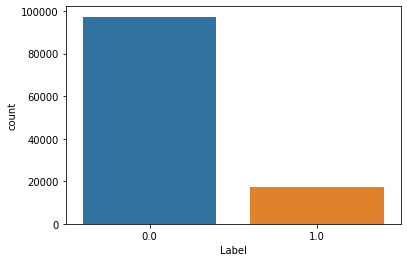

In [ ]:
#Source : https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/
#shows the proportion of the whole data both train and test
import seaborn as sns

sns.countplot(x='Label', data=cleanData (data_frame))

In [4]:
def convertSequenceWordsToText(input_list,  fileName, lastFileName):
    X_and_Y = pd.read_csv(fileName , encoding="utf-8")
    text = ''
    counter = 97594
    for item in range(len(input_list)):
      if counter <= 800000:
        for i in range(len(input_list [item+97594])):
          text += list(input_list[item+ 97594])[i] + ' '
      else:
        break
      
      print(counter)    
      X_and_Y.loc [counter, 'text'] = text.strip()
      X_and_Y.to_csv(lastFileName ,index=False, encoding='utf-8-sig')
      counter = counter + 1
      text =''
    print("This is counter: " ,counter-1)

In [3]:
# load additional module
import pickle

# define a list of places

# file_name = "/content/drive/MyDrive/Final/lemmatize_tweet_list.pkl"
# open_file = open(file_name, "wb")
# pickle.dump(lemmatize_tweet_list, open_file)
# open_file.close()

file_name = "/content/drive/MyDrive/Final/lemmatize_tweet_list.pkl"
open_file = open(file_name, "rb")
lemmatize_tweet_list = pickle.load(open_file)
open_file.close()



In [5]:

convertSequenceWordsToText(lemmatize_tweet_list,'/content/drive/MyDrive/Final/Prepared_Data.csv', '/content/drive/MyDrive/Final/Prepared_Data.csv')

Streaming output truncated to the last 5000 lines.
109223
109224
109225
109226
109227
109228
109229
109230
109231
109232
109233
109234
109235
109236
109237
109238
109239
109240
109241
109242
109243
109244
109245
109246
109247
109248
109249
109250
109251
109252
109253
109254
109255
109256
109257
109258
109259
109260
109261
109262
109263
109264
109265
109266
109267
109268
109269
109270
109271
109272
109273
109274
109275
109276
109277
109278
109279
109280
109281
109282
109283
109284
109285
109286
109287
109288
109289
109290
109291
109292
109293
109294
109295
109296
109297
109298
109299
109300
109301
109302
109303
109304
109305
109306
109307
109308
109309
109310
109311
109312
109313
109314
109315
109316
109317
109318
109319
109320
109321
109322
109323
109324
109325
109326
109327
109328
109329
109330
109331
109332
109333
109334
109335
109336
109337
109338
109339
109340
109341
109342
109343
109344
109345
109346
109347
109348
109349
109350
109351
109352
109353
109354
109355
109356
109357
1093

IndexError: ignored

In [ ]:

convertSequenceWordsToText(lemmatize_tweet_list_test, '/content/drive/MyDrive/Final/X_and_Y_test.csv', '/content/drive/MyDrive/Final/Prepared_test_Data.csv' )
# convertSequenceWordsToText(lemmatize_tweet_list_test,'/content/drive/MyDrive/Final/Prepared_test_Data.csv', '/content/drive/MyDrive/Final/Prepared_test_Data.csv' )


In [6]:
#divide data to train and test
dataFrame =  pd.read_csv ('/content/drive/MyDrive/Final/Prepared_Data.csv', encoding='utf-8-sig')
train_data, test_data = train_test_split(dataFrame, test_size=0.3)
print('train data size: {}    test data size: {}'.format(len(train_data), len(test_data)))
train_data.to_csv('/content/drive/MyDrive/Final/Prepared_train_Data.csv' ,index=False, encoding='utf-8-sig')
test_data.to_csv('/content/drive/MyDrive/Final/Prepared_test_Data.csv' ,index=False, encoding='utf-8-sig')

train data size: 79956    test data size: 34267
